# **Implementación y Evaluación de un Sistema RAID para Comparar su Rendimiento con un Disco Individual**

## **Integrantes**
- **Johana Catalina Ríos Torres**
- **Juan Guillermo Preciado Zapata**

## **Materia**
- **Sistemas Operativos**

## **Facultad**
- **Ingeniería de Sistemas, Universidad de Antioquia (UdeA)**


### **Significado de las métricas en KDiskMark**:

#### SEQ1M Q8T1 (Secuencial, 1M bloque, 8 colas, 1 hilo):

- Lectura/Escritura secuencial con bloques de 1 MB usando una cola de comandos de 8 solicitudes y 1 hilo.
- Representa el rendimiento cuando se leen o escriben grandes cantidades de datos en orden (por ejemplo, archivos grandes).

#### SEQ1M Q1T1 (Secuencial, 1M bloque, 1 cola, 1 hilo):

- Lectura/Escritura secuencial con bloques de 1 MB usando una cola de comandos de 1 solicitud y 1 hilo.
- Refleja el rendimiento de operaciones de lectura/escritura secuenciales más simples.

####RND4K Q32T1 (Aleatoria, 4K bloque, 32 colas, 1 hilo):

- Lectura/Escritura aleatoria con bloques de 4 KB, usando 32 colas de comandos y 1 hilo.
- Es relevante para cargas de trabajo que implican acceso aleatorio, como bases de datos o sistemas con muchos pequeños archivos.

#### RND4K Q1T1 (Aleatoria, 4K bloque, 1 cola, 1 hilo):

- Lectura/Escritura aleatoria con bloques de 4 KB, usando 1 cola de comandos y 1 hilo.
- Refleja el rendimiento de accesos aleatorios simples, típico de aplicaciones con pequeños accesos aleatorios.


In [4]:
!pip install researchpy

### **Tipo de ANOVA a Aplicar**

#### **1. ANOVA de dos vías (Two-Way ANOVA):**

- Este tipo de ANOVA es adecuado para evaluar el efecto de dos factores (tipo de almacenamiento y tipo de medición) sobre una variable dependiente continua (rendimiento).
- También analiza la interacción entre los factores, es decir, si el efecto del tipo de almacenamiento depende del tipo de medición.

---

#### **Hipótesis a probar**:

- **H₀ (nula)**: No hay diferencia en el rendimiento entre RAID 0 y el disco único.
- **H₀ (nula)**: No hay diferencia en el rendimiento entre los diferentes tipos de medición.
- **H₀ (nula)**: No hay interacción entre el tipo de almacenamiento y el tipo de medición.

---

#### **Modelo estadístico**:


$$ Y_{ijk} = \mu + A_i + B_j + (AB)_{ij} + \epsilon_{ijk}$$


Donde:
- $$A_i$$:Efecto del tipo de almacenamiento.
- $$B_j$$:Efecto del tipo de medición.
- $$(AB)_{ij}$$:Interacción entre los factores.
- $$epsilon_{ijk}$$:Error aleatorio.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import researchpy as rp
import scipy.stats as stats

from scipy.stats import probplot
from scipy.stats import levene

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
bank_data = pd.read_csv('./dataset/data_rendimiento.csv')

bank_data.head()

,ID,Fecha,Prueba,Storage,Medicion,Throughput_MB_s
0,1,11/16/2024,Prueba-1,RAID-0,SEQ1M Q8T1 Read,167.61
1,2,11/16/2024,Prueba-1,RAID-0,SEQ1M Q1T1 Read,159.84
2,3,11/16/2024,Prueba-1,RAID-0,RND4K Q32T1 Read,0.84
3,4,11/16/2024,Prueba-1,RAID-0,RND4K Q1T1 Read,0.56
4,5,11/16/2024,Prueba-1,RAID-0,SEQ1M Q8T1 Write,154.66


In [18]:
bank_data.shape

(896, 6)

In [40]:
import pandas as pd

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Calcular la media de rendimiento agrupando por 'Storage' y 'Medicion'
media_rendimiento = df.groupby(['Storage', 'Medicion'])['Throughput_MB_s'].mean().reset_index()

# Mostrar los resultados en una tabla en Jupyter Notebook
from IPython.display import display
display(media_rendimiento)

# Si usas solo la terminal, imprime los resultados:
print(media_rendimiento)


,Storage,Medicion,Throughput_MB_s
0,DISCO-UNICO,RND4K Q1T1 Read,0.461893
1,DISCO-UNICO,RND4K Q1T1 Write,1.254607
2,DISCO-UNICO,RND4K Q32T1 Read,0.516929
3,DISCO-UNICO,RND4K Q32T1 Write,1.262286
4,DISCO-UNICO,SEQ1M Q1T1 Read,116.674857
5,DISCO-UNICO,SEQ1M Q1T1 Write,95.397786
6,DISCO-UNICO,SEQ1M Q8T1 Read,130.697964
7,DISCO-UNICO,SEQ1M Q8T1 Write,97.531393
8,RAID-0,RND4K Q1T1 Read,0.628889
9,RAID-0,RND4K Q1T1 Write,2.215556


        Storage           Medicion  Throughput_MB_s
0   DISCO-UNICO    RND4K Q1T1 Read         0.461893
1   DISCO-UNICO   RND4K Q1T1 Write         1.254607
2   DISCO-UNICO   RND4K Q32T1 Read         0.516929
3   DISCO-UNICO  RND4K Q32T1 Write         1.262286
4   DISCO-UNICO    SEQ1M Q1T1 Read       116.674857
5   DISCO-UNICO   SEQ1M Q1T1 Write        95.397786
6   DISCO-UNICO    SEQ1M Q8T1 Read       130.697964
7   DISCO-UNICO   SEQ1M Q8T1 Write        97.531393
8        RAID-0    RND4K Q1T1 Read         0.628889
9        RAID-0   RND4K Q1T1 Write         2.215556
10       RAID-0   RND4K Q32T1 Read         0.989630
11       RAID-0  RND4K Q32T1 Write         2.347407
12       RAID-0    SEQ1M Q1T1 Read       165.853704
13       RAID-0   SEQ1M Q1T1 Write       120.601111
14       RAID-0    SEQ1M Q8T1 Read       176.715926
15       RAID-0   SEQ1M Q8T1 Write       163.050000
16       RAID-1    RND4K Q1T1 Read         0.324897
17       RAID-1   RND4K Q1T1 Write         0.341931
18       RAI

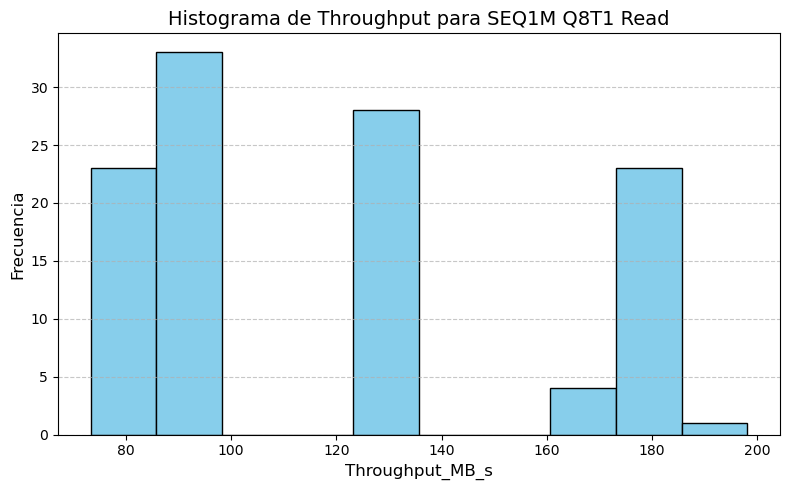

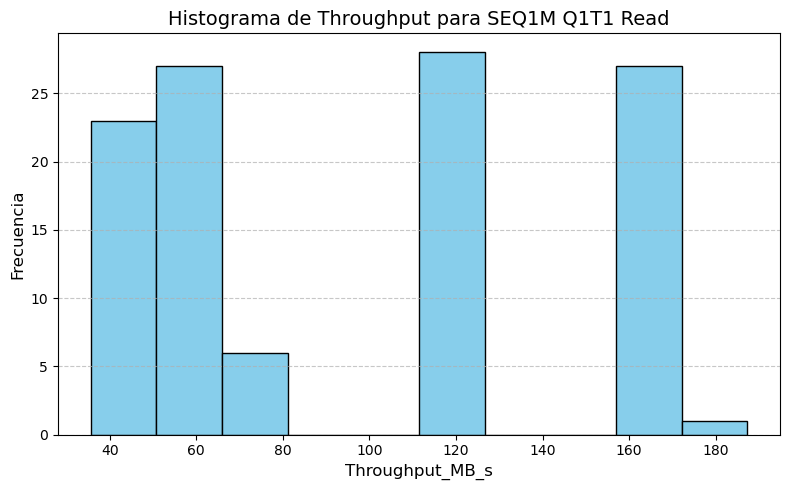

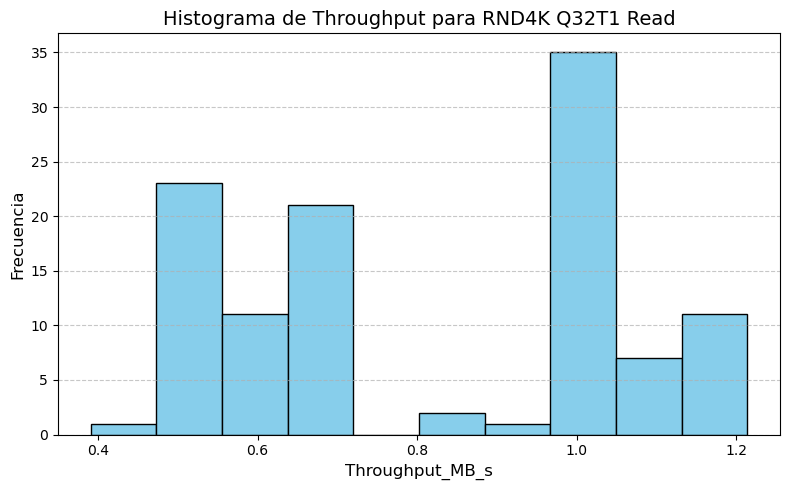

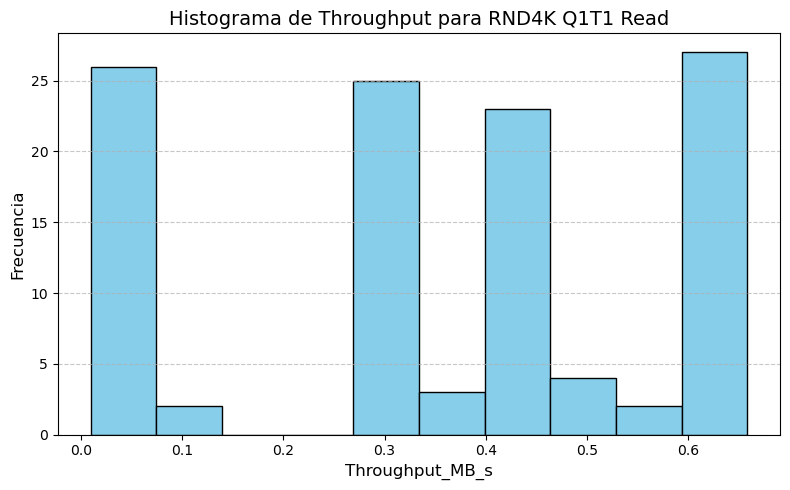

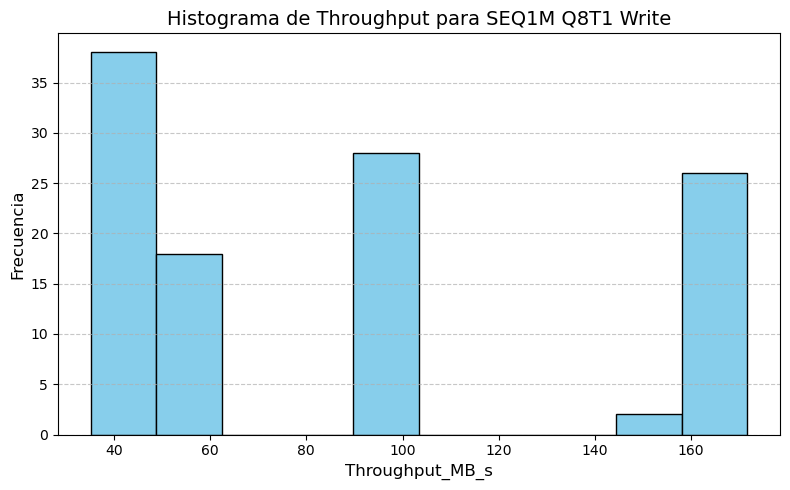

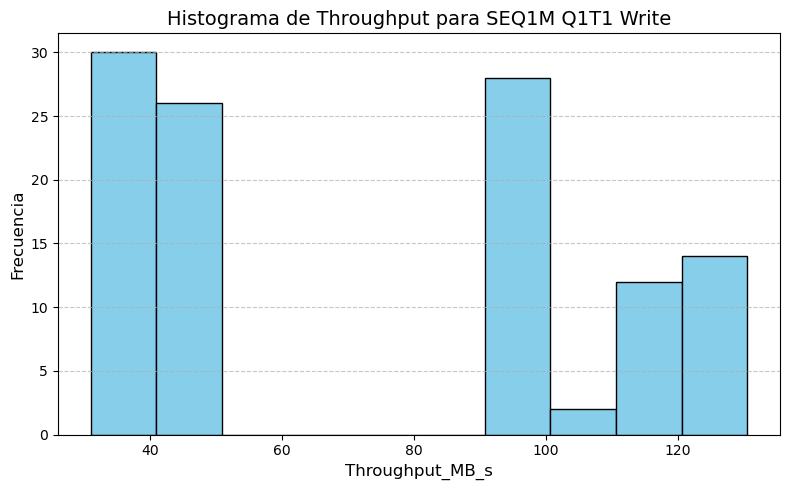

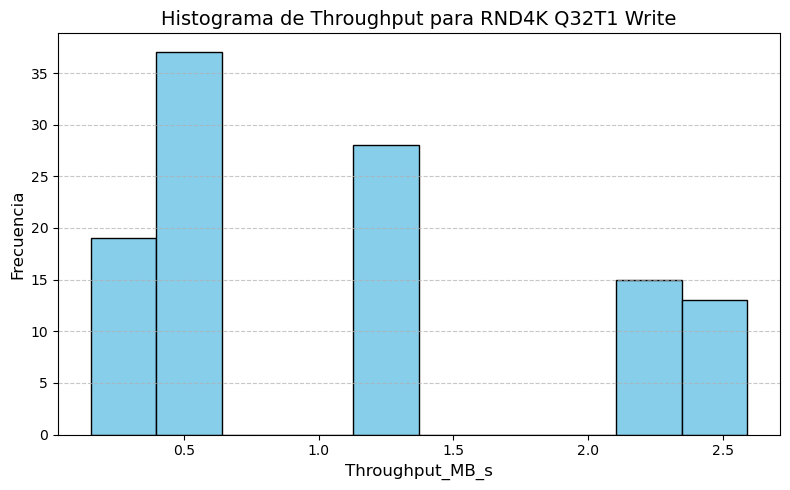

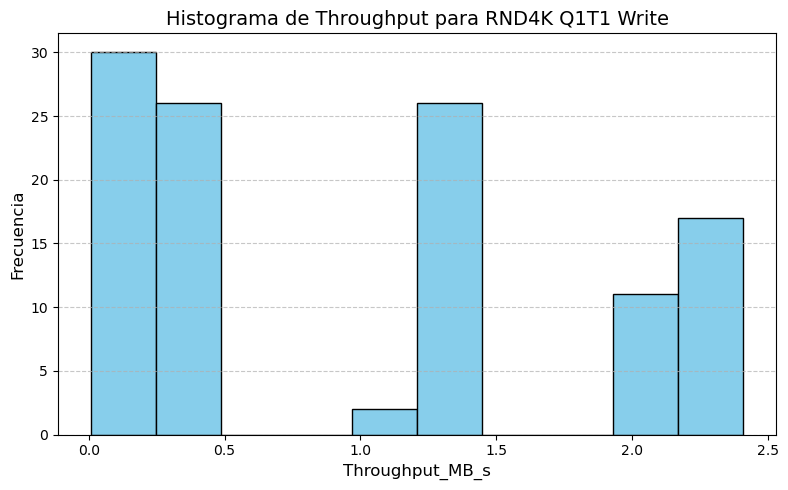

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Lista única de tipos de medición
tipos_medicion = df['Medicion'].unique()

# Generar un histograma para cada tipo de medición
for medicion in tipos_medicion:
    # Filtrar datos por el tipo de medición actual
    datos_filtrados = df[df['Medicion'] == medicion]
    
    # Crear histograma
    plt.figure(figsize=(8, 5))
    plt.hist(datos_filtrados['Throughput_MB_s'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de Throughput para {medicion}", fontsize=14)
    plt.xlabel("Throughput_MB_s", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


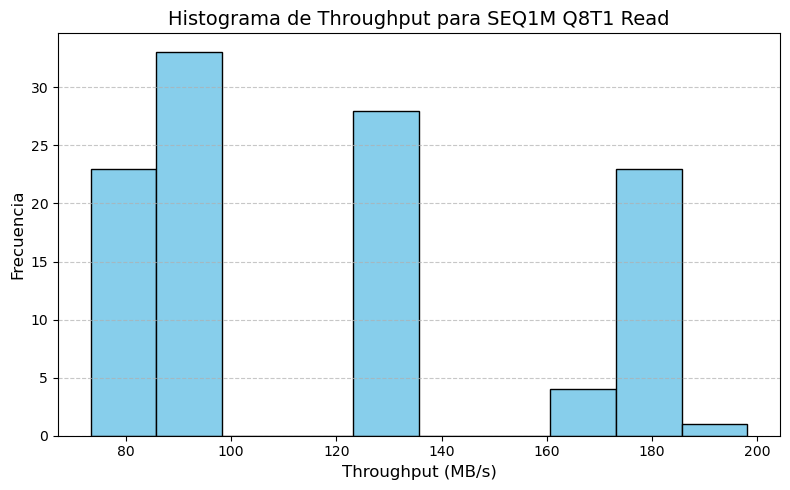

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Filtrar los datos para "SEQ1M Q8T1 Read"
datos_filtrados = df[df['Medicion'] == "SEQ1M Q8T1 Read"]

# Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados['Throughput_MB_s'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histograma de Throughput para SEQ1M Q8T1 Read", fontsize=14)
plt.xlabel("Throughput (MB/s)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 1. Distribución de los Datos

- Multimodalidad:

El histograma muestra varios picos distintos en diferentes rangos de Throughput (MB/s). Esto indica que los datos no tienen una distribución unimodal (como la normal), sino que parecen ser multimodales.

- Hay grupos de valores frecuentes alrededor de los rangos:
    - 80-100 MB/s.
    - 140-160 MB/s.
    - 180-200 MB/s.
    
- Falta de simetría:

La distribución no es simétrica; parece haber varias agrupaciones en diferentes rangos de rendimiento.

## 2. Posibles Causas

Impacto de diferentes configuraciones:

Es probable que la variabilidad en el Throughput esté asociada con el tipo de configuración de almacenamiento (como RAID 0, RAID 1, RAID 5).
Las diferencias podrían reflejar la capacidad de cada configuración para manejar lecturas secuenciales en cargas específicas.
Datos heterogéneos:

Si los datos provienen de varias pruebas o entornos diferentes, esto puede introducir multimodalidad en los resultados.

## 3. Relación con el ANOVA

La forma de esta distribución tiene implicaciones importantes para un análisis ANOVA:

Supuesto de normalidad:

Dado que la distribución parece multimodal, es poco probable que cumpla con el supuesto de normalidad de los residuos. Esto podría afectar la validez de los resultados del ANOVA.
Pruebas adicionales necesarias:
Se debería realizar una prueba de normalidad (como Shapiro-Wilk) para confirmar si los residuos del modelo ANOVA cumplen este supuesto.
Si los datos no son normales, considera transformar los datos o usar una prueba alternativa (como Kruskal-Wallis).

## 4. Interpretación General
La variabilidad en los datos sugiere que el rendimiento de las lecturas secuenciales (SEQ1M Q8T1 Read) depende de factores adicionales.
Las agrupaciones en los datos podrían estar relacionadas con:
Diferencias entre tipos de almacenamiento (RAID 0, RAID 1, RAID 5).
Variaciones en el entorno de prueba o configuraciones del hardware.

- Recomendaciones
Separar por grupos:

Analiza los datos por tipo de almacenamiento o por otras categorías relevantes para identificar patrones más específicos.
Realizar pruebas estadísticas:

Realiza una prueba de normalidad en los residuos del ANOVA.
Si la normalidad no se cumple, considera usar transformaciones de datos (logaritmo, raíz cuadrada) o pruebas no paramétricas.
Visualización adicional:

Genera boxplots o diagramas de violín para explorar cómo varía el rendimiento por tipo de almacenamiento.

<Axes: xlabel='Throughput_MB_s', ylabel='Count'>

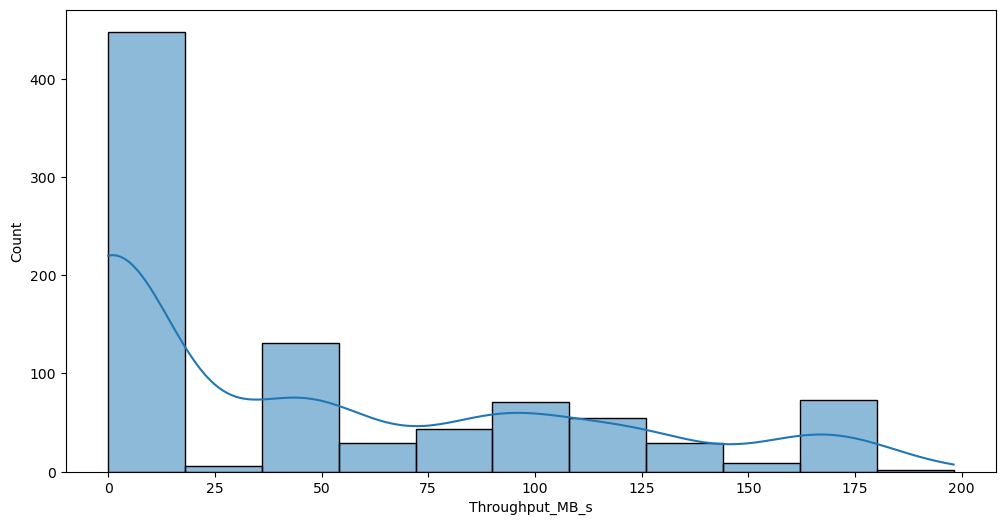

In [43]:
plt.figure(figsize = (12, 6))

sns.histplot(bank_data['Throughput_MB_s'], kde = True)

In [44]:
rp.summary_cont(bank_data['Throughput_MB_s'].groupby(bank_data['Storage']))

,N,Mean,SD,SE,95% Conf.,Interval
Storage,,,,,,
DISCO-UNICO,224,55.4747,55.7165,3.7227,48.1385,62.8109
RAID-0,216,79.0503,79.2130,5.3898,68.4267,89.6738
RAID-1,232,31.1270,36.2131,2.3775,26.4426,35.8114
RAID-5,224,27.7890,30.1591,2.0151,23.8179,31.7600


In [45]:
rp.summary_cont(bank_data['Throughput_MB_s'].groupby(bank_data['Medicion']))

,N,Mean,SD,SE,95% Conf.,Interval
Medicion,,,,,,
RND4K Q1T1 Read,112,0.3577,0.2241,0.0212,0.3157,0.3996
RND4K Q1T1 Write,112,0.9407,0.8702,0.0822,0.7777,1.1036
RND4K Q32T1 Read,112,0.8096,0.2414,0.0228,0.7644,0.8548
RND4K Q32T1 Write,112,1.1352,0.7844,0.0741,0.9883,1.2821
SEQ1M Q1T1 Read,112,97.1875,48.2601,4.5601,88.1513,106.2237
SEQ1M Q1T1 Write,112,74.7058,34.7943,3.2878,68.1909,81.2207
SEQ1M Q8T1 Read,112,120.2862,37.5997,3.5528,113.2460,127.3264
SEQ1M Q8T1 Write,112,88.0362,48.5976,4.5920,78.9368,97.1356


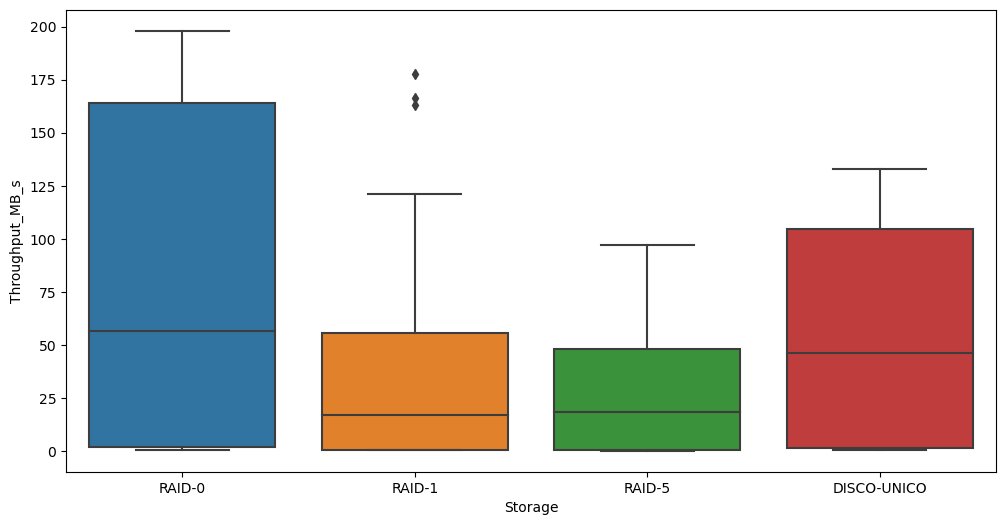

In [46]:
plt.figure(figsize = (12, 6))

sns.boxplot(y = 'Throughput_MB_s' , x = 'Storage', data = bank_data)

plt.show()

## Interpretacion: 

1. RAID 0:

Rendimiento más alto: Tiene los valores de Throughput más elevados, con una mediana cercana a los 125 MB/s y valores máximos cerca de los 200 MB/s.
Alta variabilidad: Presenta una gran dispersión en los datos, lo que significa que su rendimiento no es consistente.

2. RAID 1:

Rendimiento bajo: La mediana está cerca de los 50 MB/s, indicando un rendimiento significativamente menor comparado con RAID 0.
Valores atípicos: Existen puntos fuera de los bigotes superiores, lo que podría indicar ciertas pruebas con rendimientos inusualmente altos.
Menor variabilidad: La mayoría de los datos están concentrados, lo que sugiere un comportamiento más estable.

3. RAID 5:

El rendimiento más bajo: La mediana está cerca de los 25 MB/s, lo que indica un rendimiento pobre en comparación con todas las demás configuraciones.
Baja variabilidad: Los datos están estrechamente agrupados, mostrando un rendimiento consistentemente bajo.

4. Disco Único:

Rendimiento intermedio: Tiene una mediana cercana a los 100 MB/s, superando a RAID 1 y RAID 5, pero inferior a RAID 0.
Alta variabilidad: Similar a RAID 0, la dispersión de los datos es notable, indicando fluctuaciones significativas en el rendimiento.

### Comparación Global
RAID 0 tiene el mejor rendimiento, pero su alta variabilidad podría no ser ideal para aplicaciones que requieren consistencia.
RAID 1 tiene un rendimiento bajo pero es más estable; podría ser útil en sistemas donde la redundancia es más importante que el rendimiento.
RAID 5 presenta el peor rendimiento, aunque es consistente; esto podría deberse a la sobrecarga asociada con el cálculo de paridad.
Disco Único ofrece un rendimiento competitivo, aunque menos predecible que RAID 1.

### Conclusión
Si el rendimiento máximo es prioritario, RAID 0 es la mejor opción.
Si la estabilidad es más importante, RAID 1 podría ser preferido a costa de menor rendimiento.
RAID 5 no parece competitivo en términos de rendimiento, pero podría ser útil en escenarios donde la tolerancia a fallos sea crítica.
El Disco Único ofrece un balance razonable entre rendimiento y simplicidad.


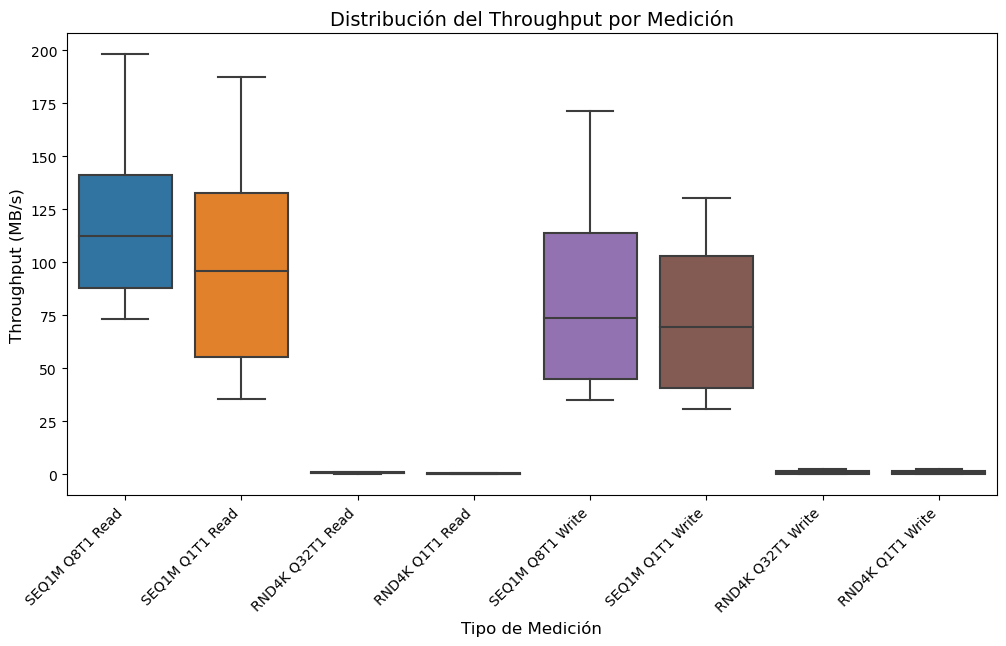

In [47]:
plt.figure(figsize = (12, 6))

sns.boxplot(y = 'Throughput_MB_s' , x = 'Medicion', data = bank_data)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotación diagonal
plt.title("Distribución del Throughput por Medición", fontsize=14)
plt.xlabel("Tipo de Medición", fontsize=12)
plt.ylabel("Throughput (MB/s)", fontsize=12)

plt.show()

## Interpretacion: 

### Observaciones Generales por Tipo de Medición

1. **SEQ1M Q8T1 Read y SEQ1M Q1T1 Read: **

Estas mediciones presentan los valores de Throughput más altos, con medianas cercanas a 125 MB/s para Q8T1 y alrededor de 100 MB/s para Q1T1.
La variabilidad es moderada, con valores mínimos y máximos relativamente amplios.
Esto indica que las lecturas secuenciales son significativamente más rápidas y consistentes en comparación con las otras mediciones.

2. **RND4K Q32T1 Read y RND4K Q1T1 Read:**
Estas mediciones tienen valores de Throughput muy bajos, con medianas cercanas a 0 MB/s.
La caja es extremadamente pequeña, lo que sugiere muy poca variabilidad. Esto podría reflejar limitaciones del sistema para manejar operaciones aleatorias de lectura.

3. **SEQ1M Q8T1 Write y SEQ1M Q1T1 Write:**
Las operaciones de escritura secuencial muestran un rendimiento razonable, con medianas entre 50-100 MB/s dependiendo de la configuración (Q8T1 es más rápida que Q1T1).
Existe algo de dispersión en los valores, pero no tan significativa como en las lecturas.

4. **RND4K Q32T1 Write y RND4K Q1T1 Write:**
Similar a las operaciones de lectura aleatoria, el rendimiento es extremadamente bajo, con medianas cercanas a 0 MB/s.
La falta de variabilidad también sugiere que el sistema tiene problemas consistentes con operaciones aleatorias.

### 2. Comparación entre RAID y Disco Único (implícito)
Aunque no está explícito en la gráfica si cada medición corresponde a RAID o Disco Único, se pueden inferir las siguientes generalidades:

Lecturas secuenciales (SEQ1M Q8T1 y Q1T1) probablemente beneficien más a configuraciones RAID (especialmente RAID 0), lo que explica los valores altos.
Operaciones aleatorias (RND4K) parecen tener un rendimiento consistentemente bajo para todas las configuraciones, lo cual podría ser un cuello de botella inherente al hardware o software.

### 3. Conclusión
Lecturas secuenciales son el punto fuerte tanto de RAID como del disco único, siendo RAID 0 probablemente el más beneficiado.
Operaciones aleatorias presentan un bajo rendimiento, lo cual podría ser un área a mejorar si estas operaciones son críticas para el sistema.
Las diferencias en escritura secuencial son menos pronunciadas, pero aún muestran cierta variabilidad entre configuraciones.

In [48]:
model_one_way = ols('Throughput_MB_s ~  C(Storage)', data = bank_data).fit()

sm.stats.anova_lm(model_one_way)

,df,sum_sq,mean_sq,F,PR(>F)
C(Storage),3.0,3.783116e+05,126103.878930,44.162004,1.298937e-26
Residual,892.0,2.547091e+06,2855.483597,NaN,NaN


## Intepretación:

### El tipo de almacenamiento (Storage) tiene un efecto significativo en el Throughput_MB_s:

El valor 𝑃 < 0.05 indica que las diferencias entre los grupos (RAID 0, RAID 1, RAID 5, Disco Único) no son debidas al azar.
Esto significa que el tipo de almacenamiento influye significativamente en el rendimiento del throughput.

- Aunque el ANOVA confirma que hay diferencias significativas, es importante analizar más a fondo:
    - ¿Qué tipos de almacenamiento difieren entre sí? Esto puede explorarse con un análisis post hoc como Tukey HSD.
    
    - ¿Qué tan grandes son las diferencias en términos prácticos?

In [49]:
model_one_way.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     44.16
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.30e-26
Time:                        00:22:36   Log-Likelihood:                -4834.1
No. Observations:                 896   AIC:                             9676.
Df Residuals:                     892   BIC:                             9695.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.4747      3.570     15.537      0.000      48.467      62.482
C(Storage)[T.RAID-0]    23.5756      5.096      4.626      0.000      13.574      33.577
C(Storage)[T.RAID-1]   -24.3477      5.006     -4.864      0.000     -34.172     -14.524
C(Storage)[T.RAID-5]   -27.6857      5.049     -5.483      0.000     -37.596     -17.776
==============================================================================
Omnibus:                      308.350   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.423
Skew:                           0.224   Prob(JB):                     6.82e-12
Kurtosis:                       1.915   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. **Efecto del tipo de almacenamiento:**

- RAID 0 mejora significativamente el rendimiento en comparación con el Disco Único (+23.58 MB/s).

- RAID 1 y RAID 5 reducen significativamente el rendimiento en comparación con el Disco Único (−24.35 y −27.69 MB/s, respectivamente).

2. **Limitaciones del modelo:**

El bajo valor de 𝑅2  (12.9%) indica que hay factores adicionales no incluidos en este modelo que influyen en el rendimiento.

In [63]:
## Anova bidireccional sin interacción con dos variables explicativas categóricas
model_two_way_without_interaction = ols('Throughput_MB_s ~ C(Storage) + C(Medicion)' , 
                                        data = bank_data).fit()

sm.stats.anova_lm(model_two_way_without_interaction)

,df,sum_sq,mean_sq,F,PR(>F)
C(Storage),3.0,3.783116e+05,126103.878930,257.246092,5.164069e-120
C(Medicion),7.0,2.113258e+06,301894.003073,615.849830,0.000000e+00
Residual,885.0,4.338333e+05,490.207172,NaN,NaN


In [64]:
model_two_way_without_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     508.3
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:05:08   Log-Likelihood:                -4041.1
No. Observations:                 896   AIC:                             8104.
Df Residuals:                     885   BIC:                             8157.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.9000      2.453      3.220      0.001       3.085      12.715
C(Storage)[T.RAID-0]                23.5756      2.111     11.166      0.000      19.432      27.719
C(Storage)[T.RAID-1]               -24.3477      2.074    -11.740      0.000     -28.418     -20.277
C(Storage)[T.RAID-5]               -27.6857      2.092    -13.234      0.000     -31.792     -23.580
C(Medicion)[T.RND4K Q1T1 Write]      0.5830      2.959      0.197      0.844      -5.224       6.390
C(Medicion)[T.RND4K Q32T1 Read]      0.4520      2.959      0.153      0.879      -5.355       6.259
C(Medicion)[T.RND4K Q32T1 Write]     0.7775      2.959      0.263      0.793      -5.029       6.584
C(Medicion)[T.SEQ1M Q1T1 Read]      96.8298      2.959     32.728      0.000      91.023     102.637
C(Medicion)[T.SEQ1M Q1T1 Write]     74.3481      2.959     25.129      0.000      68.541      80.155
C(Medicion)[T.SEQ1M Q8T1 Read]     119.9285      2.959     40.535      0.000     114.122     125.735
C(Medicion)[T.SEQ1M Q8T1 Write]     87.6785      2.959     29.634      0.000      81.872      93.485
==============================================================================
Omnibus:                       16.418   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.139
Skew:                           0.242   Prob(JB):                     0.000851
Kurtosis:                       2.619   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretación:

1. Almacenamiento:

- RAID 0 mejora significativamente el throughput en comparación con el Disco Único.
- RAID 1 y RAID 5 tienen un rendimiento significativamente peor que el Disco Único.

2. Medición:

- Las operaciones secuenciales (SEQ1M) son las más significativas para mejorar el throughput, especialmente SEQ1M Q8T1 Read.
- Las operaciones aleatorias (RND4K) no tienen un impacto significativo en el throughput.

3. Importancia Práctica:

- Los sistemas que dependen de operaciones secuenciales podrían beneficiarse enormemente de RAID 0 y configuraciones optimizadas para SEQ1M.
- Las configuraciones RAID 1 y RAID 5 no son ideales para maximizar el throughput.

4. Rendimiento Global del Modelo:

- El modelo explica un 85.2% de la variabilidad en los datos, lo que sugiere que los factores de almacenamiento y medición son determinantes en el rendimiento.

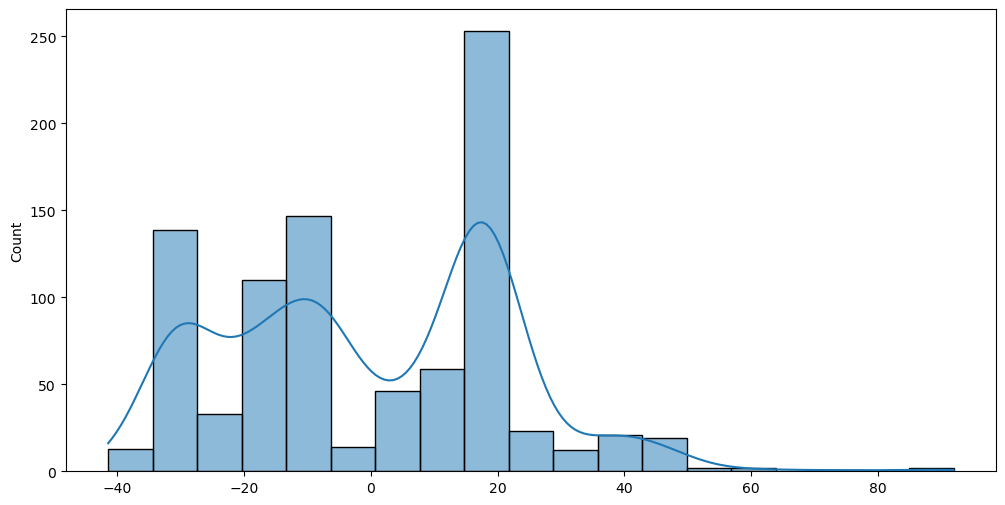

In [65]:
## Comprobar hipotesis de Normalidad en torno a los residuos
plt.figure(figsize = (12, 6))

sns.histplot(model_two_way_without_interaction.resid, kde = True)
plt.show()

1. Forma de la Distribución
- Asimetría:

La distribución de los residuos no parece ser completamente simétrica.
Hay una acumulación de residuos en valores cercanos a 20, lo que sugiere una leve asimetría hacia la derecha (cola más larga hacia valores positivos).

- Bimodalidad:

La curva KDE sugiere la presencia de dos picos principales, lo cual no es característico de una distribución normal (que debería tener un único pico en el centro).
Esto puede indicar la influencia de múltiples patrones o grupos no capturados completamente por el modelo.

- Extremos:

Existen valores atípicos o extremos en el rango de −40 a 80, lo que también contribuye a la desviación de la normalidad.

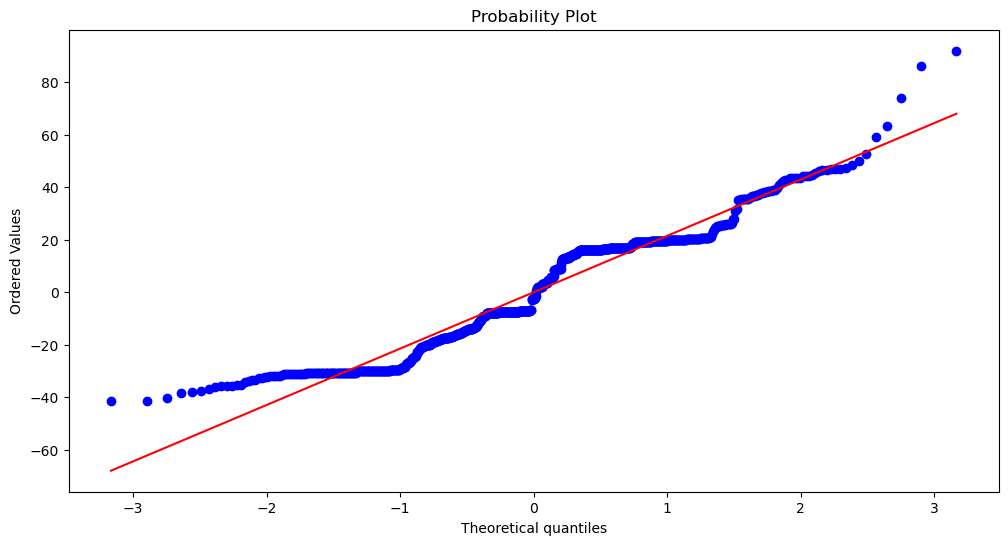

In [54]:
plt.figure(figsize = (12, 6))

probplot(model_two_way_without_interaction.resid, dist = 'norm', plot = plt);

**La gráfica muestra que:**

- Los residuos tienen una distribución aproximadamente normal en el centro.
- Los extremos presentan desviaciones significativas, sugiriendo colas pesadas o valores atípicos.
- Es importante realizar pruebas adicionales o ajustar el modelo para mejorar la robustez de las conclusiones estadísticas.

In [55]:
stats.shapiro(model_two_way_without_interaction.resid)

ShapiroResult(statistic=0.9449739456176758, pvalue=9.689659042714558e-18)

## Prueba de Shapiro-Wilk

La prueba de Shapiro-Wilk se utiliza para evaluar si una muestra de datos sigue una distribución normal. Es una prueba estadística común para verificar el supuesto de normalidad en análisis estadísticos, como la regresión lineal y ANOVA.

1. statistic = 0.9449:

- Es el estadístico 𝑊 de Shapiro-Wilk.
- Valores cercanos a 1 indican una mayor concordancia con la normalidad.
- En este caso, 𝑊=0.9449 sugiere que los datos no son perfectamente normales.

2. pvalue = 9.69 \times 10^{-18}:

- Un valor extremadamente bajo (𝑝 < 0.05) indica que los datos no siguen una distribución normal.
- En este caso, 𝑝≈0, lo que rechaza la hipótesis nula de normalidad.


## ¿Qué significa esto para el modelo?
1. Resultados:

- La prueba indica que los residuos del modelo no son normales.
- Esto puede afectar la validez de las inferencias estadísticas, como los valores 𝑝 y los intervalos de confianza.

2. Implicaciones:

- La no normalidad puede ser tolerable si el tamaño de muestra es grande (896 observaciones en este caso) debido al Teorema Central del Límite.
- Sin embargo, para mayor precisión, podrían considerarse transformaciones de los datos o modelos alternativos.

In [56]:
model_two_way_with_interaction = ols('Throughput_MB_s ~ C(Storage) * C(Medicion)' , 
                                     data = bank_data).fit()

sm.stats.anova_lm(model_two_way_with_interaction)

,df,sum_sq,mean_sq,F,PR(>F)
C(Storage),3.0,3.783116e+05,126103.878930,2408.101301,0.0
C(Medicion),7.0,2.113258e+06,301894.003073,5765.019663,0.0
C(Storage):C(Medicion),21.0,3.885887e+05,18504.222656,353.359810,0.0
Residual,864.0,4.524467e+04,52.366517,NaN,NaN


## nterpretación de la Tabla del Modelo ANOVA con Interacción
Esta tabla muestra los resultados de un ANOVA de dos vías con interacción, donde se analiza cómo los factores Storage y Medicion, así como su interacción, influyen en el Throughput_MB_s.

1. Tipo de Almacenamiento:

RAID 0, RAID 1, RAID 5 y Disco Único tienen efectos significativamente diferentes en el rendimiento.

2. Tipo de Medición:

Las operaciones secuenciales (SEQ1M) y aleatorias (RND4K) también afectan significativamente el throughput.

3. Interacción:

- El rendimiento no solo depende del almacenamiento o la medición de forma aislada, sino también de cómo interactúan estos factores.
- Por ejemplo, RAID 0 puede mostrar un mayor rendimiento en operaciones secuenciales, mientras que RAID 1 podría tener un rendimiento más consistente en operaciones aleatorias.



In [57]:
model_two_way_with_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1774.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                -3028.4
No. Observations:                 896   AIC:                             6121.
Df Residuals:                     864   BIC:                             6274.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.4619      1.368      0.338      0.736      -2.222       3.146
C(Storage)[T.RAID-0]                                      0.1670      1.952      0.086      0.932      -3.664       3.998
C(Storage)[T.RAID-1]                                     -0.1370      1.917     -0.071      0.943      -3.900       3.626
C(Storage)[T.RAID-5]                                     -0.4360      1.934     -0.225      0.822      -4.232       3.360
C(Medicion)[T.RND4K Q1T1 Write]                           0.7927      1.934      0.410      0.682      -3.003       4.589
C(Medicion)[T.RND4K Q32T1 Read]                           0.0550      1.934      0.028      0.977      -3.741       3.851
C(Medicion)[T.RND4K Q32T1 Write]                          0.8004      1.934      0.414      0.679      -2.996       4.596
C(Medicion)[T.SEQ1M Q1T1 Read]                          116.2130      1.934     60.089      0.000     112.417     120.009
C(Medicion)[T.SEQ1M Q1T1 Write]                          94.9359      1.934     49.087      0.000      91.140      98.732
C(Medicion)[T.SEQ1M Q8T1 Read]                          130.2361      1.934     67.339      0.000     126.440     134.032
C(Medicion)[T.SEQ1M Q8T1 Write]                          97.0695      1.934     50.190      0.000      93.274     100.865
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q1T1 Write]      0.7940      2.760      0.288      0.774      -4.624       6.212
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q1T1 Write]     -0.7757      2.711     -0.286      0.775      -6.097       4.546
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q1T1 Write]     -0.8010      2.735     -0.293      0.770      -6.169       4.567
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q32T1 Read]      0.3057      2.760      0.111      0.912      -5.112       5.723
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q32T1 Read]      0.2768      2.711      0.102      0.919      -5.045       5.599
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q32T1 Read]      1.0062      2.735      0.368      0.713      -4.362       6.375
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q32T1 Write]     0.9181      2.760      0.333      0.740      -4.500       6.336
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q32T1 Write]    -0.6778      2.711     -0.250      0.803      -6.000       4.644
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q32T1 Write]    -0.2748      2.735     -0.100      0.920      -5.643       5.093
C(Storage)[T.RAID-0]:C(Medicion)[T.SEQ1M Q1T1 Read]      49.0119      2.760     17.756      0.000      43.594      54.430
C(Storage)[T.RAID-1]:C(Medicion)[T.SEQ1M Q1T1 Read]     -50.9678      2.711    -18.797      0.000     -56.290     -45.646
C(Storage)[T.RAID-5]:C(Medicion)[

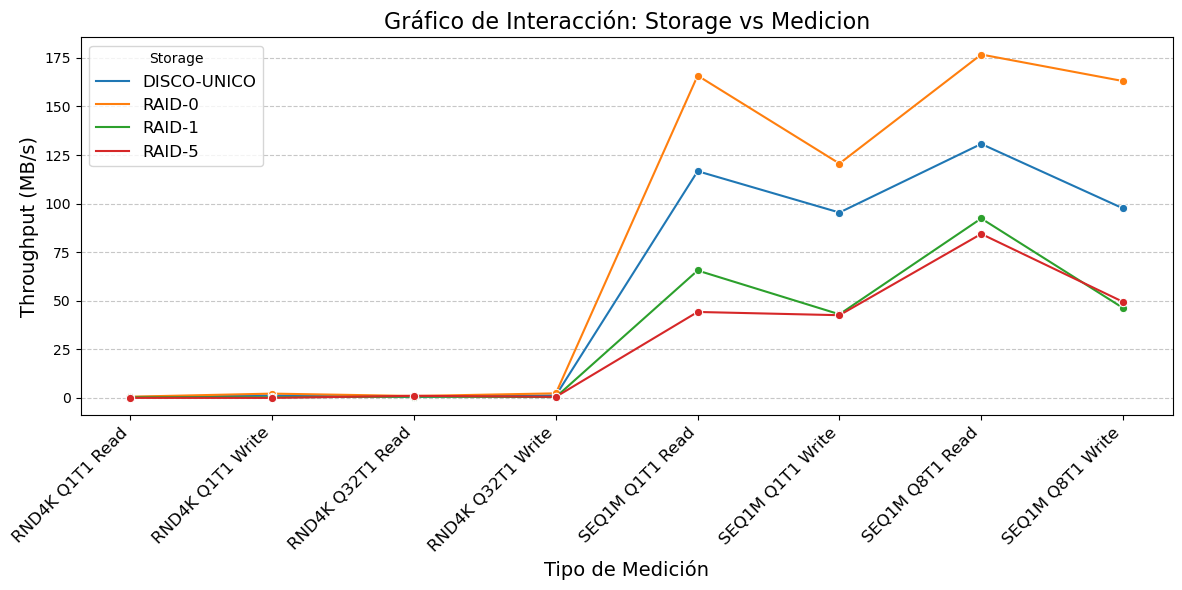

In [66]:
# Crear un gráfico de interacción
plt.figure(figsize=(12, 6))

# Usar el promedio de Throughput para cada combinación de Storage y Medicion
mean_values = bank_data.groupby(['Storage', 'Medicion'])['Throughput_MB_s'].mean().reset_index()

# Gráfico de líneas
sns.lineplot(data=mean_values, x='Medicion', y='Throughput_MB_s', hue='Storage', marker='o')

# Personalizar el gráfico
plt.title('Gráfico de Interacción: Storage vs Medicion', fontsize=16)
plt.xlabel('Tipo de Medición', fontsize=14)
plt.ylabel('Throughput (MB/s)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Storage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

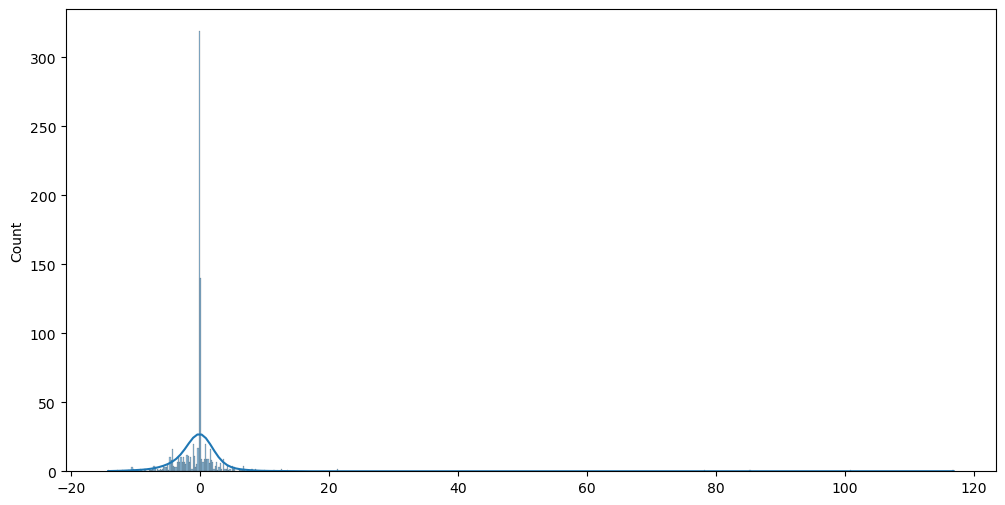

In [58]:
plt.figure(figsize = (12, 6))

sns.histplot(model_two_way_with_interaction.resid, kde = True)

plt.show()

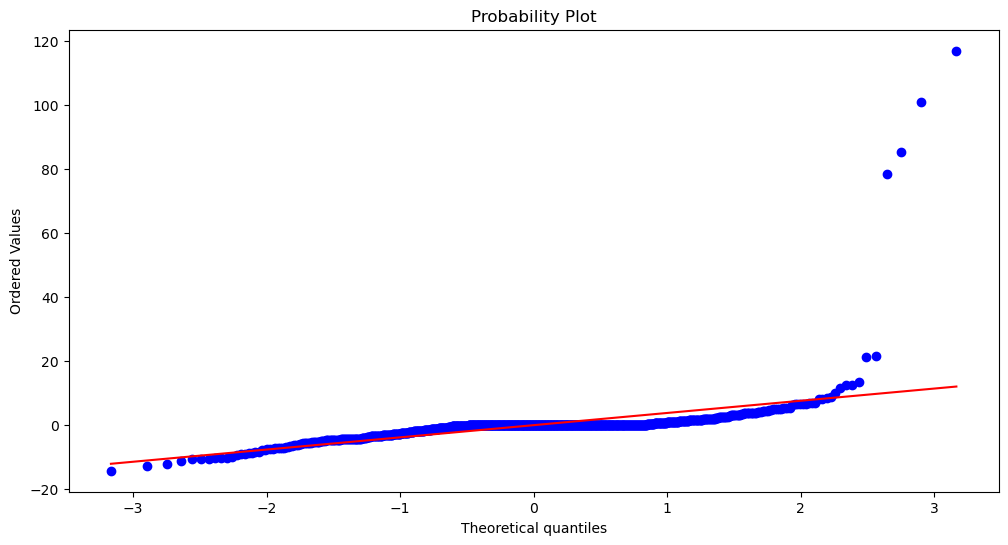

In [59]:
plt.figure(figsize = (12, 6))

probplot(model_two_way_with_interaction.resid, dist = 'norm', plot = plt);

In [60]:
stats.shapiro(model_two_way_with_interaction.resid)

ShapiroResult(statistic=0.2905787229537964, pvalue=0.0)

## Observaciones:

- Desviaciones en los extremos:

Los puntos en los extremos (colas de la distribución) se desvían significativamente de la línea roja.
Esto indica la presencia de valores extremos o colas más pesadas (leptocurtosis), lo que sugiere una desviación de la normalidad.
Centro de la distribución:

Los puntos centrales están más cerca de la línea roja, lo que sugiere que la distribución es aproximadamente normal en el rango central, pero no completamente.

## Estadístico de Shapiro-Wilk (statistic = 0.2906):

- Este valor mide qué tan bien se ajustan los datos a una distribución normal.
Valores cercanos a 1 indican una mayor normalidad, mientras que valores más bajos (como este) indican una desviación significativa.

- P-valor (pvalue = 0.0):

Un 𝑝-valor de 0.0 (menor a 0.05) indica que se rechaza la hipótesis nula de normalidad. Esto confirma estadísticamente que los residuos no siguen una distribución normal.